<a href="https://colab.research.google.com/github/Thanatipz/BSC_DPDM23/blob/main/mapplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load data

##Load excel from Gdrive

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
shopping_data = pd.read_csv('/content/drive/MyDrive/DSC_DPDM/customer_shopping_data.csv')
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


##Load excel from Gsheet

In [ ]:
#Gsheet
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
gsht = gc.open_by_key('1aFiepI0mZO8y3dNISa-GszyrqCqhkgHB56BjeyfMHC0')

In [ ]:
worksheet2 = gsht.worksheet("มิ.ย. 2563")
rows = worksheet2.get_all_values()
data_from_gsheets = pd.DataFrame.from_records(rows)

In [ ]:
data_from_gsheets.colums = data_from_gsheets.iloc[2] #set header
data_from_gsheets = data_from_gsheets.iloc[2:].reset_index().iloc[:1] # skip rows
data_from_gsheets.head()

<ipython-input-10-3e57e8dac28b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_from_gsheets.colums = data_from_gsheets.iloc[2] #set header


,index,0,1,2,3,4,5,6,7,8,...,155,156,157,158,159,160,161,162,163,164
0,2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ


#Basic stat

In [ ]:
data_from_gsheets.describe()


,index
count,1.0
mean,2.0
std,NaN
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


#Visualazation

####How many payment methods?

In [4]:
shopping_data.value_counts('payment_method')

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

####Average purchase Amount (USD) Age 40yr?

In [6]:
shopping_data[shopping_data['age']>40].mean()

<ipython-input-6-8240fae5f60c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  shopping_data[shopping_data['age']>40].mean()


age          54.976743
quantity      3.003426
price       690.853136
dtype: float64

#Histogram

In [7]:
from matplotlib  import pyplot as plt

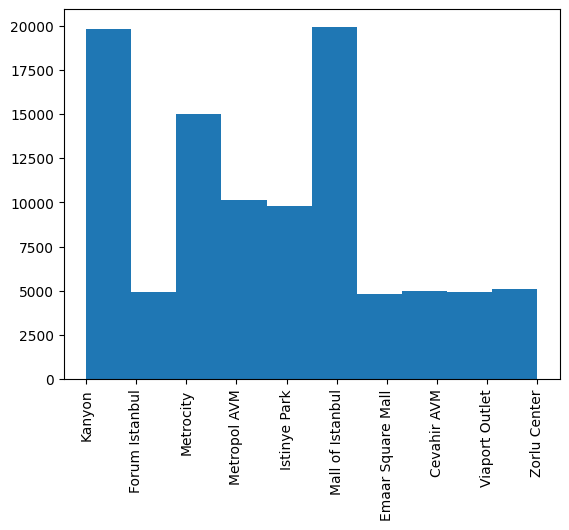

In [10]:
histoutput = plt.hist(shopping_data['shopping_mall'])
tickhist = plt.xticks(rotation='vertical')

In [12]:
histoutput[0]

array([19823.,  4947., 15011., 10161.,  9781., 19943.,  4811.,  4991.,
        4914.,  5075.])

In [13]:
tickhist[-1]

[Text(0, 0, 'Kanyon'),
 Text(1, 0, 'Forum Istanbul'),
 Text(2, 0, 'Metrocity'),
 Text(3, 0, 'Metropol AVM'),
 Text(4, 0, 'Istinye Park'),
 Text(5, 0, 'Mall of Istanbul'),
 Text(6, 0, 'Emaar Square Mall'),
 Text(7, 0, 'Cevahir AVM'),
 Text(8, 0, 'Viaport Outlet'),
 Text(9, 0, 'Zorlu Center')]

#Scatter

####Is there a trend in age vs price?

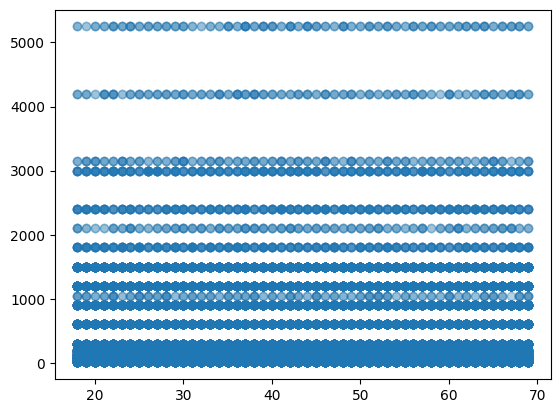

In [14]:
plt.scatter(shopping_data['age'],shopping_data['price'],alpha=0.05)

####Is there a trend in age vs quantity?

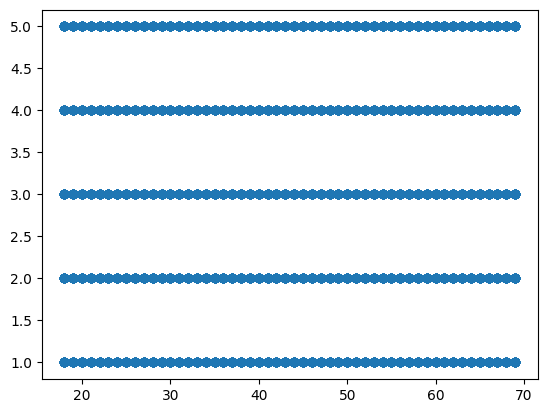

In [15]:
plt.scatter(shopping_data['age'],shopping_data['quantity'],alpha=0.05)

####Is there a trend in price vs quantity?

Text(0.5, 0, 'price')

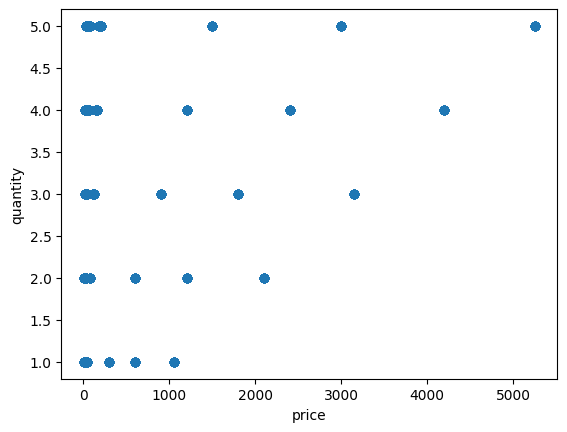

In [17]:
plt.scatter(shopping_data['price'],shopping_data['quantity'],alpha=0.05)
plt.ylabel('quantity')
plt.xlabel('price')

#Boxplot

#####Are there outliers in the picture

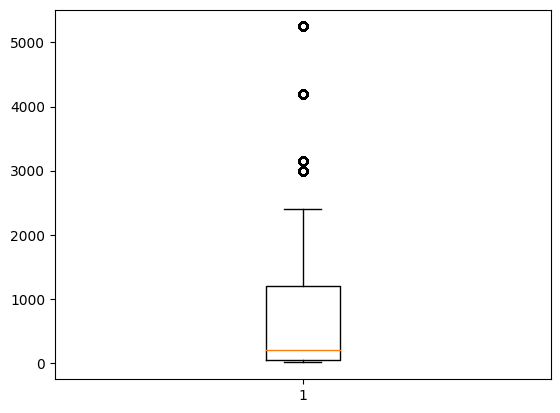

In [22]:
bpreturn = plt.boxplot(shopping_data['price'])

In [26]:
L = bpreturn['fliers'][0].get_ydata()

In [27]:
len(L)

5024

#Pie chart

####ration of male and female customers

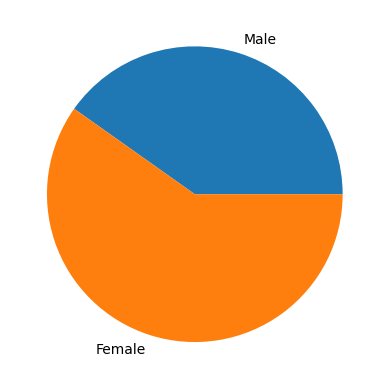

In [35]:
males = len(shopping_data[shopping_data['gender']=='Male'])
females = len(shopping_data[shopping_data['gender']=='Female'])
plt.pie([males,females],labels=['Male','Female']);

#Barchart

In [36]:
set(shopping_data['category'])

{'Books',
 'Clothing',
 'Cosmetics',
 'Food & Beverage',
 'Shoes',
 'Souvenir',
 'Technology',
 'Toys'}

In [37]:
set(shopping_data['shopping_mall'])

{'Cevahir AVM',
 'Emaar Square Mall',
 'Forum Istanbul',
 'Istinye Park',
 'Kanyon',
 'Mall of Istanbul',
 'Metrocity',
 'Metropol AVM',
 'Viaport Outlet',
 'Zorlu Center'}

In [38]:
shopping_data.groupby(['shopping_mall','category'])['quantity'].sum()

shopping_mall  category       
Cevahir AVM    Books               792
               Clothing           5180
               Cosmetics          2174
               Food & Beverage    2293
               Shoes              1473
                                  ... 
Zorlu Center   Food & Beverage    2216
               Shoes              1589
               Souvenir            716
               Technology          765
               Toys               1526
Name: quantity, Length: 80, dtype: int64

In [42]:
shopping_data.groupby(['shopping_mall','category'])['quantity'].count()

shopping_mall  category       
Cevahir AVM    Books               258
               Clothing           1729
               Cosmetics           732
               Food & Beverage     772
               Shoes               490
                                  ... 
Zorlu Center   Food & Beverage     750
               Shoes               519
               Souvenir            257
               Technology          250
               Toys                513
Name: quantity, Length: 80, dtype: int64

In [43]:
shopping_data.groupby(['shopping_mall','category'])['quantity'].sum().unstack()['Books']

shopping_mall
Cevahir AVM           792
Emaar Square Mall     730
Forum Istanbul        756
Istinye Park         1368
Kanyon               2969
Mall of Istanbul     3099
Metrocity            2271
Metropol AVM         1468
Viaport Outlet        720
Zorlu Center          809
Name: Books, dtype: int64

In [59]:
bardata = shopping_data.groupby(['shopping_mall','category'])['quantity'].sum().unstack()

In [60]:
bardata

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,792,5180,2174,2293,1473,708,780,1549
Emaar Square Mall,730,5038,2272,2109,1452,726,795,1379
Forum Istanbul,756,5239,2342,2072,1459,775,673,1536
Istinye Park,1368,10165,4396,4478,3010,1566,1438,3044
Kanyon,2969,20513,9155,8695,6065,3025,3050,5985
Mall of Istanbul,3099,20813,9193,8878,6112,2921,3067,6031
Metrocity,2271,15729,6700,6764,4349,2197,2273,4611
Metropol AVM,1468,10552,4569,4586,3237,1586,1396,3136
Viaport Outlet,720,5101,2279,2186,1471,651,784,1524


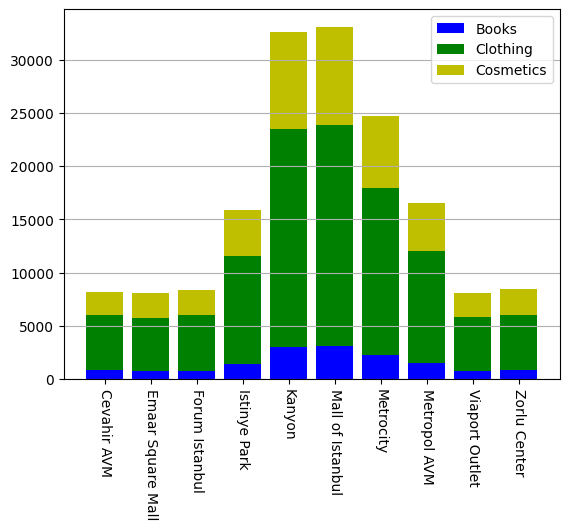

In [65]:
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Books'],color='b',label='Books')
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Clothing'],bottom = bardata['Books'],color='g',label='Clothing')
plt.bar([1,2,3,4,5,6,7,8,9,10],bardata['Cosmetics'],bottom = bardata['Books']+bardata['Clothing'],color='y',label='Cosmetics')
plt.xticks([1,2,3,4,5,6,7,8,9,10],bardata.reset_index()['shopping_mall'],rotation=270)
plt.grid(True,axis='y')
plt.legend()

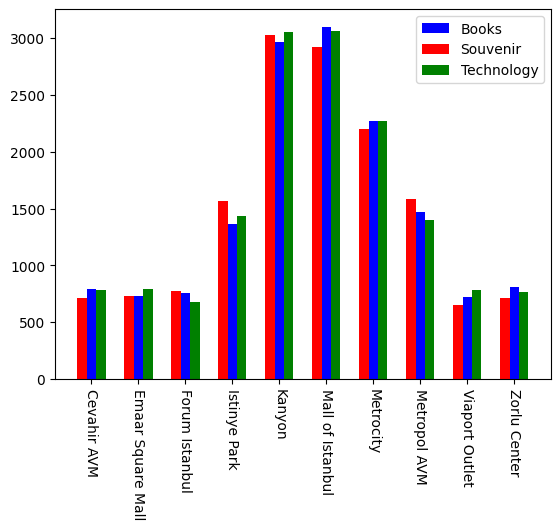

In [66]:
width = 0.2  #กำหนดความกว้างของแท่ง

plt.bar([1,2,3,4,5,6,7,8,9,10], bardata ['Books'], width , color='b',label='Books')
plt.bar([1-width,2-width,3-width,4-width,5-width,6-width,7-width,8-width,9-width,10-width], bardata ['Souvenir'], width , color='r',label='Souvenir')
plt.bar([1+width,2+width,3+width,4+width,5+width,6+width,7+width,8+width,9+width,10+width], bardata ['Technology'], width , color='g',label='Technology')

plt.xticks([1,2,3,4,5,6,7,8,9,10], bardata.reset_index()['shopping_mall'], rotation = 270)
plt.legend();

#Stack

#Distance-Similarity

In [69]:
from numpy import linalg as LA

In [75]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

In [72]:
data_points = np.array([[1,2],[-1,4],[0,-3],[-3,-2]])

In [73]:
data_points

array([[ 1,  2],
       [-1,  4],
       [ 0, -3],
       [-3, -2]])

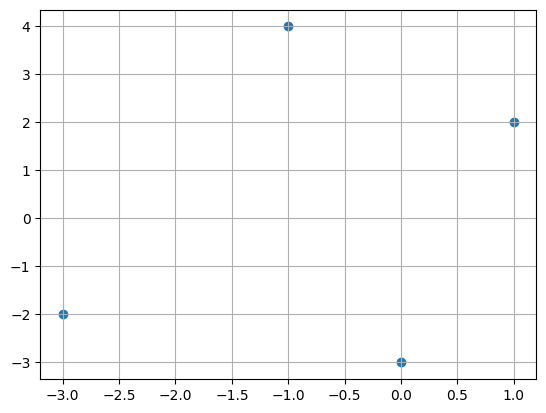

In [79]:
plt.scatter(data_points[:,0],data_points[:,1])
plt.grid(True)

In [78]:
distance_matrix(data_points,data_points)#default p=2 city block distance

array([[0.        , 2.82842712, 5.09901951, 5.65685425],
       [2.82842712, 0.        , 7.07106781, 6.32455532],
       [5.09901951, 7.07106781, 0.        , 3.16227766],
       [5.65685425, 6.32455532, 3.16227766, 0.        ]])

In [77]:
distance_matrix(data_points,data_points,p=1)

array([[0., 4., 6., 8.],
       [4., 0., 8., 8.],
       [6., 8., 0., 4.],
       [8., 8., 4., 0.]])

#Z-score

####Normalization